In [76]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import cm
from matplotlib.lines import Line2D

In [77]:
N_list = [20,40,60,80,100]
txt_list = ['./sep2_TC/N{}/Sep2_TC_N{}.npz', './sep2_CT/N{}/Sep2_CT_N{}.npz',
            './sep2_TCT/N{}/Sep2_TCT_N{}.npz','./nonsep2_TC/N{}/NonSep2_TC_N{}.npz',
            './nonsep2_CT/N{}/NonSep2_CT_N{}.npz','./nonsep2_TCT/N{}/NonSep2_TCT_N{}.npz']
txt=["[GS-TC]","[GS-CT]","[GS-TCT]","[GNS-TC]","[GNS-CT]","[GNS-TCT]"]
""" solve in finer grid  """
print("******* solve in finer grid  ********")
def fname(text,N):
    npzfile = np.load(text.format(N,N))
    Nt = npzfile['Nt']
    v_mfe=npzfile['v_mfe']
    x_mfe=npzfile['X_mfe']
    v_bar=npzfile['v_bar']
    v_error=np.asarray([np.linalg.norm(v_mfe[i,:]-v_bar[i,:], ord=np.inf) for i in range(v_mfe.shape[0])])
    J_mfe=npzfile['J_mfe']
    J_bar=npzfile['J_bar']
    return v_error , J_mfe, J_bar 


******* solve in finer grid  ********


In [78]:
#pip install latex
#sudo apt-get install texlive-latex-extra texlive-fonts-recommended dvipng cm-super

In [79]:
import matplotlib as mpl
import matplotlib.pyplot as plt
import argparse
import pylab

def set_size(width, fraction=1, subplot=[1,1]):
    if width == 'elsevier':
        width_pt=468.0
    elif width == 'beamer':
        width_pt=307.28987
    else:
        width_pt=width
    fig_width_pt=width_pt*fraction  # Width of figure
    inches_per_pt=1/80           # Convert from pt to inches
    golden_ratio=0.9               # (5**.5 - 1)/2
    fig_width_in=fig_width_pt*inches_per_pt  # Figure width in inches
    fig_hight_in=fig_width_in*golden_ratio*(subplot[0]/subplot[1])
    fig_dim=(fig_width_in,fig_hight_in)
#     print(fig_dim)
    return fig_dim

plt.style.use('seaborn-colorblind') # Using seaborn's style
nice_fonts={
    "text.usetex" : True,
    "font.family" : "serif",
    "axes.labelsize" : 5,
    "font.size" : 10,
    "legend.fontsize" : 8,
    "xtick.labelsize" : 8,
    "ytick.labelsize" :8,
}
mpl.rcParams.update(nice_fonts)

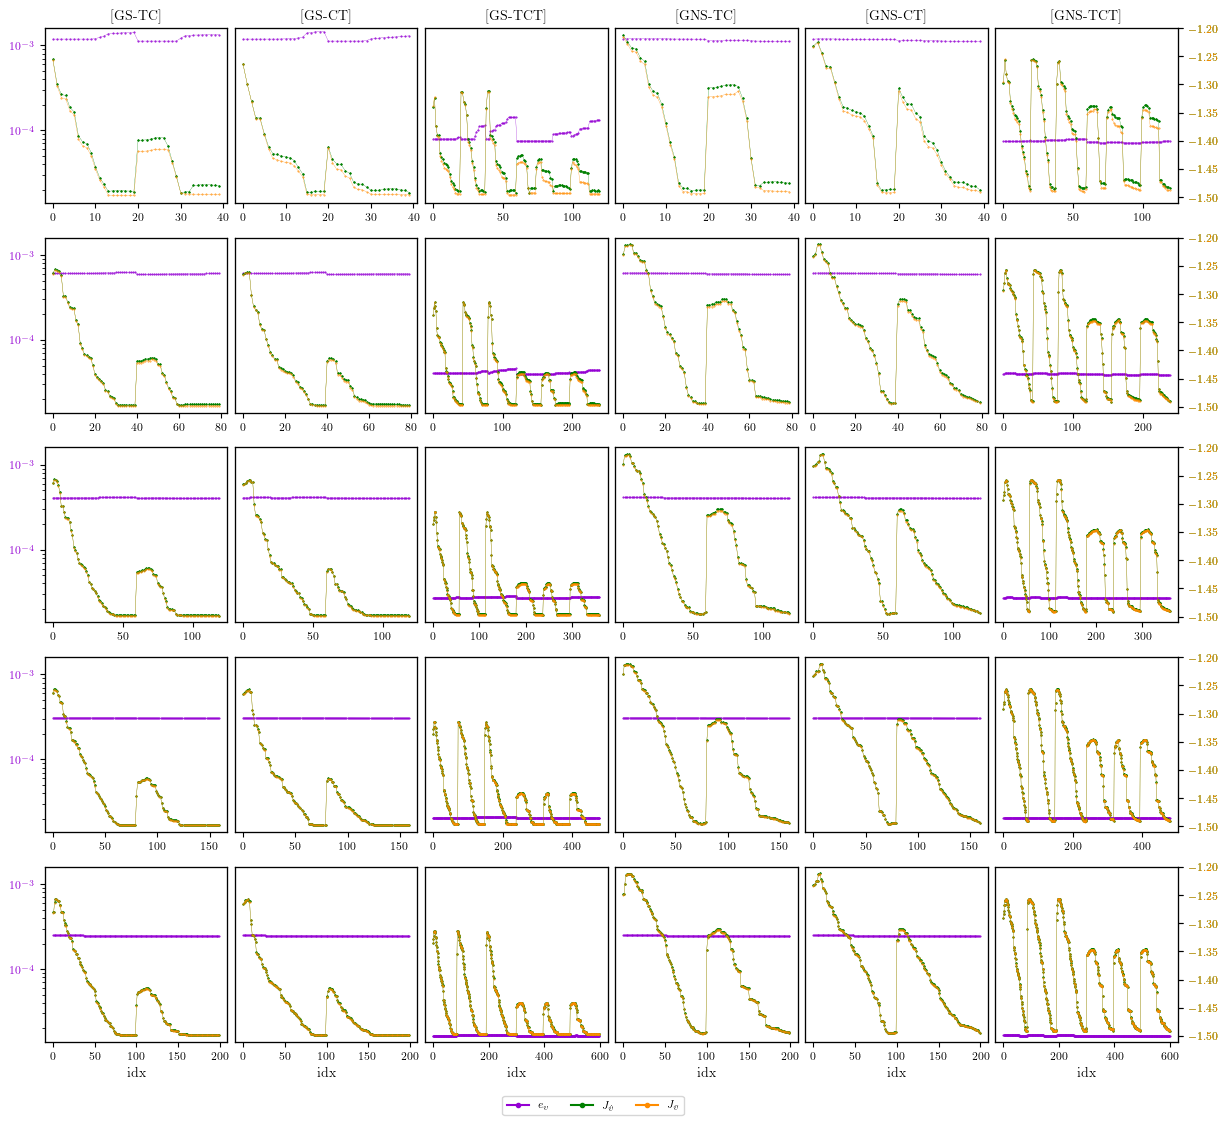

<Figure size 640x480 with 0 Axes>

In [80]:
N_list_new=np.copy(N_list)
ln=len(N_list); col=len(txt_list)
fig, axs = plt.subplots(ln, col, figsize=set_size('elsevier',fraction=2.5))
for i in range(ln):
    for j in range(col):
        if j==2 or j==5: a=3
        else: a=1
        for k in range(len(N_list)):
            N_list_new[k]=2*a*N_list[k]
        v_error, J_mfe, J_bar = fname(txt_list[j],N_list[i])
        y = np.arange(0,N_list_new[i])
        axs[i, j].scatter(y,v_error/N_list_new[i],s=1.0,marker=".",c='darkviolet',label=r'$e_{v}$')  # linestyle='solid','dotted'
        axs[i, j].plot(y,v_error/N_list_new[i],'darkviolet',linewidth=0.2)
        axs[i, j].set(ylim=(1.4e-5,1.6e-3))
        #axs[1, j].set(ylim=(3.91e-4,1.5e-3))
        #axs[2, j].set(ylim=(1.2e-5,5.0e-4))
        axs[i, j].set_yscale("log")
        #axs[i, j].set_yticks([1.0e-2,1.0e-3])
        #axs[i, j].grid()
        #axs[i, j].set_xticks([0,0.5,1])
        axs2 = axs[i, j].twinx()
        axs3 = axs[i, j].twinx()
        #axs2.plot(y,J_mfe,'r.',label=r'$J_{mfe}$',linewidth=0.05)
        #axs2.plot(y,J_bar,'r+',label=r'$J_{bar}$',linewidth=0.05)
        axs2.scatter(y,J_mfe,s=0.6,marker="*",c='green',label=r'$J_{MFE}$')
        axs2.plot(y,J_mfe,'green',linewidth=0.2)
        axs2.set(ylim=(-1.51,-1.2))
    
        axs3.scatter(y,J_bar,s=0.6,marker=".",c='darkorange',label=r'$\bar{J}$')
        axs3.plot(y,J_bar,'darkorange',linewidth=0.2)
        axs3.set(ylim=(-1.51,-1.2))
        #axs2.set(xlim=(0,N_list[j]), ylim=(-0.44,-0.31))
        
        if j!=0: 
            axs[i, j].set_yticklabels([])#.set_yticks([])
            axs[i, j].tick_params(axis='both', which='both', left=False)
        
        else:   
            axs[i, j].tick_params(axis='y', labelcolor='darkviolet')#,direction="in",pad=-22)
        """
        if i==0: 
            axs2.set_title(f"N: {N_list[j]}")
            
        axs2.set_ylim(ymin=-1.55, ymax=-1.25)
        axs3.set_ylim(ymin=-1.55, ymax=-1.25)
            #axs2.set_yticks([-0.48,-0.44,-0.40])
            #axs3.set_yticks([-0.48,-0.44,-0.40])
       """
        if i==ln-1: 
            axs[i,j].set_xlabel("idx", fontsize = 10)
        #if i==0:
         #   axs2.set_xticklabels([])#set_xticks([])
          #  axs3.set_xticklabels([])
        
        if j!=col-1: 
            axs2.set_yticklabels([])
            axs2.tick_params(axis='both', which='both', right=False)
            axs3.set_yticklabels([])
            axs3.tick_params(axis='both', which='both', right=False)
        else: 
            #axs2.set_ylabel('cost', color='green', fontsize = 10)
            axs2.tick_params(axis='y', labelcolor='green')#,direction="out",pad=26)
            axs3.tick_params(axis='y', labelcolor='darkorange')
            #axs3.new_fixed_axis(loc="right",offset=(60,0))
  
        plt.subplots_adjust(wspace=0.04, hspace=0.2)
        axs[0, j].set_title(txt[j], fontsize = 10)

#axs[ln-1, col].set_xlabel(r'$\rho$', fontsize = 12)
#axs[0, 0].set_ylabel("[LWR]", fontsize= 10)
    
#plt.xticks(rotation = 45)
labels=[r'$e_{v}$',r'$J_{MFE}$',r'$\bar{J}$']
handles=[Line2D([0], [0],marker='.',color='darkviolet',label=r'$e_{v}$'),
         Line2D([0], [0],marker='.',color='green',label=r'$J_{\hat{v}}$'),
         Line2D([0], [0],marker='.',color='darkorange',label=r'$J_{\bar{v}}$')]
fig.legend(handles=handles, loc='lower center', bbox_to_anchor=(0.5, 0.05), ncol=8,) #center right

plt.show()
#fig.savefig("./fig_2class_micro_sep_nonsep.pdf", dpi=300, bbox_inches='tight')
#fig.savefig("./fig_2class_micro_sep_nonsep.png", dpi=300, bbox_inches='tight')

plt.clf()

In [81]:
import math
ln=len(txt_list); col=len(N_list)
MaxRA=np.zeros((ln,col))
MeanRA=np.zeros((ln,col))
log_N=[]
for i in range(ln):
    if i==2 or i==5: a=3
    else: a=1
    for k in range(len(N_list)):
        N_list_new[k]=2*a*N_list[k]
    log_N.append([math.log(x) for x in N_list_new])
    for j in range(col):
        v_error, J_mfe, J_bar = fname(txt_list[i],N_list[j])
        accuracy = np.asarray([sum(x) for x in zip(J_mfe,-J_bar)])
        MaxRA[i,j] = accuracy.max()/abs(J_mfe).max()
        MeanRA[i,j] = sum(accuracy)/sum(abs(J_mfe))
log_MaxRA = [[math.log(x) for x in MaxRA[i,:]] for i in range(ln)]
log_MeanRA = [[math.log(x) for x in MeanRA[i,:]] for i in range(ln)]
from scipy.stats import linregress
max_res=[linregress(log_N[i], log_MaxRA[i]) for i in range(ln)]
mean_res=[linregress(log_N[i], log_MeanRA[i]) for i in range(ln)]
max_slope=[max_res[i].slope for i in range(ln)] 
mean_slope=[mean_res[i].slope for i in range(ln)]
#print(MaxRA[4,:],MeanRA[4,:])

In [82]:
import matplotlib as mpl
import matplotlib.pyplot as plt
import argparse
import pylab

def set_size(width, fraction=1, subplot=[1,1]):
    if width == 'elsevier':
        width_pt=468.0
    elif width == 'beamer':
        width_pt=307.28987
    else:
        width_pt=width
    fig_width_pt=width_pt*fraction  # Width of figure
    inches_per_pt=1/80           # Convert from pt to inches
    golden_ratio=0.3               # (5**.5 - 1)/2
    fig_width_in=fig_width_pt*inches_per_pt  # Figure width in inches
    fig_hight_in=fig_width_in*golden_ratio*(subplot[0]/subplot[1])
    fig_dim=(fig_width_in,fig_hight_in)
#     print(fig_dim)
    return fig_dim

plt.style.use('seaborn-colorblind') # Using seaborn's style
nice_fonts={
    "text.usetex" : True,
    "font.family" : "serif",
    "axes.labelsize" : 5,
    "font.size" : 10,
    "legend.fontsize" : 8,
    "xtick.labelsize" : 8,
    "ytick.labelsize" :8,
}
mpl.rcParams.update(nice_fonts)

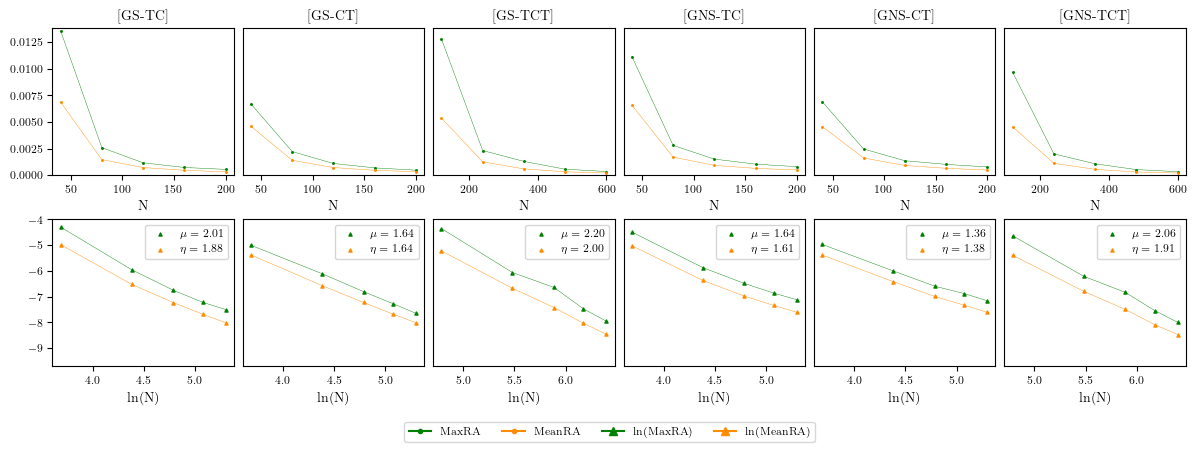

<Figure size 640x480 with 0 Axes>

In [83]:
fig, axs = plt.subplots(2, ln, figsize=set_size('elsevier',fraction=2.5))
for i in range(2):
    for j in range(ln):
        if j==2 or j==5: a=3
        else: a=1
        for k in range(len(N_list)):
            N_list_new[k]=2*a*N_list[k]
        if i==0:
            axs[i, j].scatter(N_list_new[:], MaxRA[j,:], s=5, marker=".",c='green', label=r'$MaxRA$')
            axs[i, j].plot(N_list_new[:], MaxRA[j,:],'green',linewidth=0.3, label=r'$MaxRA$')
            axs[i, j].scatter(N_list_new[:], MeanRA[j,:], s=5,marker=".",c='darkorange', label=r'$MeanRA$')
            axs[i, j].plot(N_list_new[:], MeanRA[j,:],'darkorange',linewidth=0.3, label=r'$MeanRA$')
            #axs[i, j].set_yscale("log")
        else:
            label1=r'$\mu={:.2f}$'.format(-max_slope[j]); label2=r'$\eta={:.2f}$'.format(-mean_slope[j])
            axs[i, j].scatter(log_N[j], log_MaxRA[j], s=5, marker="^",c='green', label=label1)
            axs[i, j].plot(log_N[j], log_MaxRA[j],'green',linewidth=0.3)#, label=label1)
            axs[i, j].scatter(log_N[j], log_MeanRA[j], s=5, marker="^",c='darkorange', label=label2)
            axs[i, j].plot(log_N[j], log_MeanRA[j],'darkorange',linewidth=0.3)#, label=label2)
            axs[i, j].legend()
            #axs[i, j].plot(log_N, [max_res[i].intercept + max_res[i].slope*x for x in log_N], "--", label="reg_MaxRA")
            #axs[i, j].plot(log_N, [mean_res[i].intercept + mean_res[i].slope*x for x in log_N], "--", label="reg_MeanRA")
        
        axs[0, j].set_ylim(ymin=0.0, ymax=0.0138)
        axs[1, j].set_ylim(ymin=-9.7, ymax=-4)
        #axs[0, j].set(ylim=(1.0e-4,0.2e-1))
        #axs[1, j].set(ylim=(1.0e-4,0.2e-1))
        #axs[i, j].set_yticks([1.0e-2,1.0e-3])
        #axs[i, j].grid()
        #axs[i, j].set_xticks([0,0.5,1])
        
        if j!=0: 
            axs[i, j].set_yticklabels([])#.set_yticks([])
            axs[i, j].tick_params(axis='both', which='both', left=False)
        #else:   
            #axs[i, j].tick_params(axis='y', labelcolor='blue',direction="in",pad=-22)

            #
            #axs3.set_ylim(ymin=-0.44, ymax=-0.31)
            #axs2.set_yticks([-0.44,-0.40,-0.36, -0.32])
            #axs3.set_yticks([-0.44,-0.40,-0.36, -0.32])
        #if i==ln-1: 
            #axs2.set_xlabel("idx", fontsize = 10)
        #if j!=col-1: 
            #axs2.set_yticklabels([])
            #axs2.tick_params(axis='both', which='both', right=False)
            #axs3.set_yticklabels([])
            #axs3.tick_params(axis='both', which='both', right=False)
        #else: 
            #axs2.set_ylabel('cost', color='green', fontsize = 10)
            #axs2.tick_params(axis='y', labelcolor='green')#,direction="out",pad=26)
            #axs3.tick_params(axis='y', labelcolor='orange')
            #axs3.new_fixed_axis(loc="right",offset=(60,0))
        
        plt.subplots_adjust(wspace=0.05, hspace=0.3)
        
        axs[0,j].set_xlabel("N", fontsize = 10)
        axs[1,j].set_xlabel("ln(N)", fontsize = 10) 
#axs[0,0].set_xticklabels([])#set_xticks([])
#axs[0,1].set_xticklabels([])#set_xticks([])
#axs[ln-1, col].set_xlabel(r'$\rho$', fontsize = 12)
#axs[0, 0].set_ylabel("[LWR]", fontsize= 10)
        axs[0, j].set_title(txt[j], fontsize = 10)
#plt.xticks(rotation = 45)
labels=[r'$MaxRA$',r'$MeanRA$',r'$ln(MaxRA)$',r'$ln(MeanRA)$']
handles=[Line2D([0], [0],marker='.',color='green',label='MaxRA'),
         Line2D([0], [0],marker='.',color='darkorange',label='MeanRA'),
         Line2D([0], [0],marker='^',color='green',label='ln(MaxRA)'),
        Line2D([0], [0],marker='^',color='darkorange',label='ln(MeanRA)')]
fig.legend(handles=handles, loc='center right', bbox_to_anchor=(0.65, -0.04), ncol=4,) #center right

plt.show()
#fig.savefig("./fig_2class_RA_sep_nonsep.pdf", dpi=300, bbox_inches='tight')
#fig.savefig("./fig_2class_RA_sep_nonsep.png", dpi=300, bbox_inches='tight')
plt.clf()

In [84]:
txt_list[3:]
txt2_list = ['./sep2_TC/N{}/data_solutions_grid4.npz', './sep2_CT/N{}/data_solutions_grid4.npz',
            './sep2_TCT/N{}/data_solutions_grid3.npz','./nonsep2_TC/N{}/data_solutions_grid4.npz',
            './nonsep2_CT/N{}/data_solutions_grid4.npz','./nonsep2_TCT/N{}/data_solutions_grid3.npz']
N_list = [20,40,60,80,100]#,200]
def control_cost(text1,text2,N):
    npzfile = np.load(text1.format(N,N))
    Nt = npzfile['Nt']
    v_mfe=npzfile['v_mfe']
    v_bar=npzfile['v_bar']
    J_mfe=npzfile['J_mfe']
    J_bar=npzfile['J_bar']
    x_mfe=npzfile['X_mfe']
    x_bar=npzfile['x_bar']
    npzfile2 = np.load(text2.format(N))
    s_u1 = npzfile2['s_u1']
    s_u2 = npzfile2['s_u2']
    x_points = npzfile2['x_points']
    c_points = x_points[:-1] + np.diff(x_points)/2
    return Nt, v_mfe, v_bar, J_mfe, J_bar, x_mfe, x_bar, c_points, s_u1, s_u2

In [85]:
import matplotlib as mpl
import matplotlib.pyplot as plt
import argparse
import pylab

def set_size(width, fraction=1, subplot=[1,1]):
    if width == 'elsevier':
        width_pt=468.0
    elif width == 'beamer':
        width_pt=307.28987
    else:
        width_pt=width
    fig_width_pt=width_pt*fraction  # Width of figure
    inches_per_pt=1/80           # Convert from pt to inches
    golden_ratio=0.9               # (5**.5 - 1)/2
    fig_width_in=fig_width_pt*inches_per_pt  # Figure width in inches
    fig_hight_in=fig_width_in*golden_ratio*(subplot[0]/subplot[1])
    fig_dim=(fig_width_in,fig_hight_in)
#     print(fig_dim)
    return fig_dim

plt.style.use('seaborn-colorblind') # Using seaborn's style
nice_fonts={
    "text.usetex" : True,
    "font.family" : "serif",
    "axes.labelsize" : 5,
    "font.size" : 10,
    "legend.fontsize" : 8,
    "xtick.labelsize" : 8,
    "ytick.labelsize" :8,
}
mpl.rcParams.update(nice_fonts)

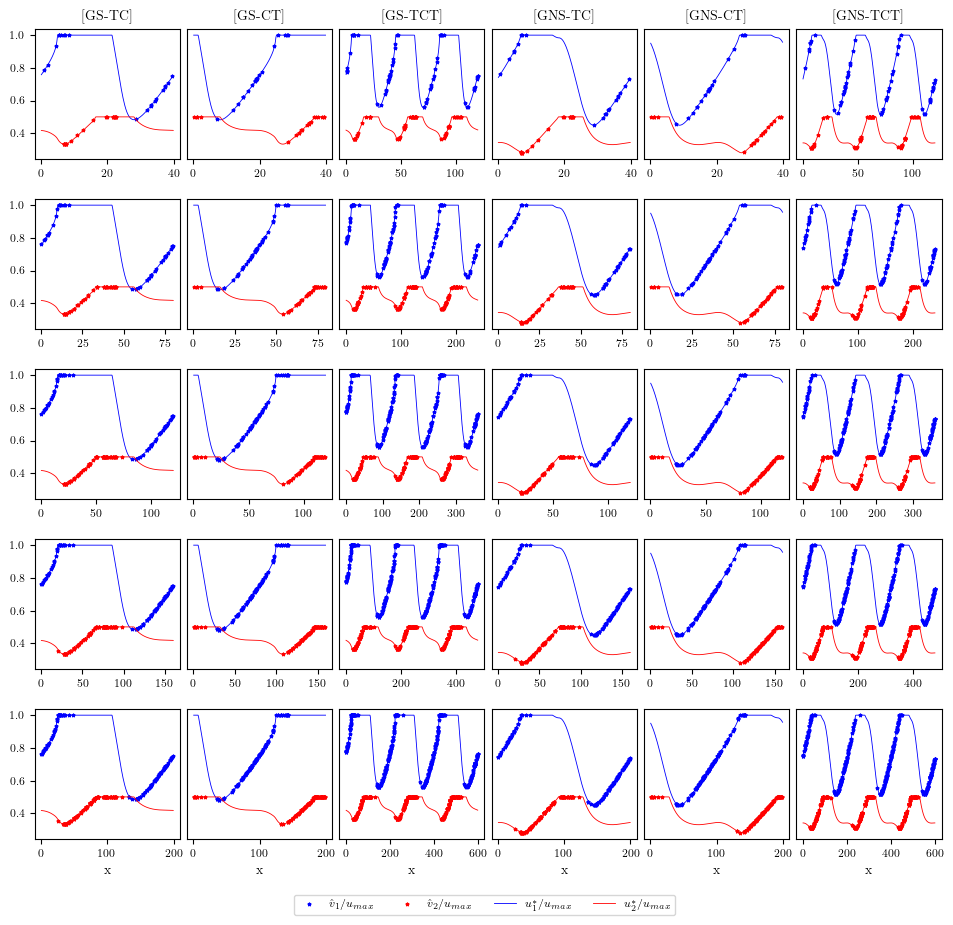

<Figure size 640x480 with 0 Axes>

In [86]:
from matplotlib.lines import Line2D
ln=len(N_list); col=len(txt_list)
N_list_new=np.copy(N_list)
fig, axs = plt.subplots(ln, col, figsize=set_size('elsevier',fraction=2.0))
for i in range(ln):
    for j in range(col):
        if j==2 or j==5: a=3
        else: a=1
        for k in range(len(N_list)):
            N_list_new[k]=2*a*N_list[k]
        Nt, v_mfe, v_bar, J_mfe, J_bar, x_mfe, x_bar, c_points, s_u1, s_u2 = control_cost(txt_list[j],txt2_list[j],N_list[i])
        ti = int(Nt/5) 
        y1 = x_mfe[:a*N_list[i],ti]; y2 = x_mfe[a*N_list[i]:,ti]
        v1 = v_mfe[:a*N_list[i],ti]; v2 = v_mfe[a*N_list[i]:,ti]
        axs[i, j].scatter(y1,v1/N_list[i], s=5, marker="*",c='blue', label=r'$\hat{v}_1/u_{max}$')
        axs[i, j].scatter(y2,v2/N_list[i], s=5, marker="*",c='red',label=r'$\hat{v}_2/u_{max}$')
        axs[i, j].plot(c_points,s_u1[:,ti]/N_list[i],'b',linewidth=0.6,label=r'$u^*_1/u_{max}$')
        axs[i, j].plot(c_points,s_u2[:,ti]/N_list[i],'r',linewidth=0.6,label=r'$u^*_2/u_{max}$')
        axs[i, j].set_ylim(ymin=0.24, ymax=1.04)
        #plt.grid(True, which ="both")
        #axs[i, j].set_title("N:{N}".format(N=N_list_new[j]))
        if i==ln-1:
            axs[i, j].set_xlabel('x', fontsize = 10)
        if i==0: 
            axs[i, j].set_title(txt[j], fontsize = 10)
            
        if j!=0:
            axs[i, j].set_yticks([])
            axs[i, j].tick_params(axis='both', which='both', right=False)
        plt.subplots_adjust(wspace=0.05, hspace=0.3)
        
labels=[r'$\hat{v}_1/u_{max}$',r'$\hat{v}_2/u_{max}$',r'$u^*_1/u_{max}$',r'$u^*_2/u_{max}$']
plt.legend(labels=labels, loc='center right', bbox_to_anchor=(-0.8, -0.5), ncol=4,) #center right
   
plt.show()
#fig.savefig("./fig_2class_control_sep_nonsep_t0.6.pdf", dpi=300, bbox_inches='tight')
#fig.savefig("./fig_2class_control_sep_nonsep_t0.6.png", dpi=300, bbox_inches='tight')
plt.clf()